# Week3授業課題 信用情報の分析

## 【問題1】コンペティション内容の把握

### Home Creditはどのような企業

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

The company uses of a variety of alternative data - including telco and transactional information - to predict their clients' repayment abilities.

They made available their data to the Kaggle community and are challenging Kagglers to help them unlock the full potential of their data.

<とりあえず直訳>  
Home Creditは、1997年にチェコ共和国で設立された非銀行金融機関です。
同社は14か国（米国、ロシア、カザフスタン、ベラルーシ、中国、インドを含む）で事業を展開しており、主に信用をほとんどまたはまったく持たない人々に融資を行っています。
Home Creditグループには、2900万人以上の顧客、210億ユーロの総資産、1億6千万件以上のローンがあり、その大部分はアジア、そしてその半数近くは中国です（2018年5月19日現在）。
同社は、電話会社や取引情報を含むさまざまな代替データを使用して、顧客の返済能力を予測しています。
彼らはデータをKaggleコミュニティに提供し、Kagglersがデータの可能性を最大限に引き出すのを支援するよう挑戦しています。  

<端的にまとめると>  
融資するにあたり、返済能力があるかないかを様々なデータから調査判断する会社  

### このコンペティションでは何を予測する？

債務者の支払能力。
- 0: 支払い問題がなかった人
- 1：支払に問題があった人

### それを予測することで企業が得られるメリットは何？

- 貸倒損失の回避
- 貸出機会の拡大

## 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。
  
- .head()、.info()、describe()などを使う

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.get_option("display.max_columns")

In [96]:
path = '/Users/toyodasatomi/Desktop/DIC/data/application_train.csv'

In [97]:
df = pd.read_csv(path)

In [98]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [100]:
pd.set_option('display.max_columns', 200)
display(df.describe())


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

<font color = "red">momo: describeで前列見るには？</fond>  
pd.set_option('display.max_columns', 200)

### 欠損値の有無を見る

In [101]:
# missingnoモジュールをimport
import missingno as msno

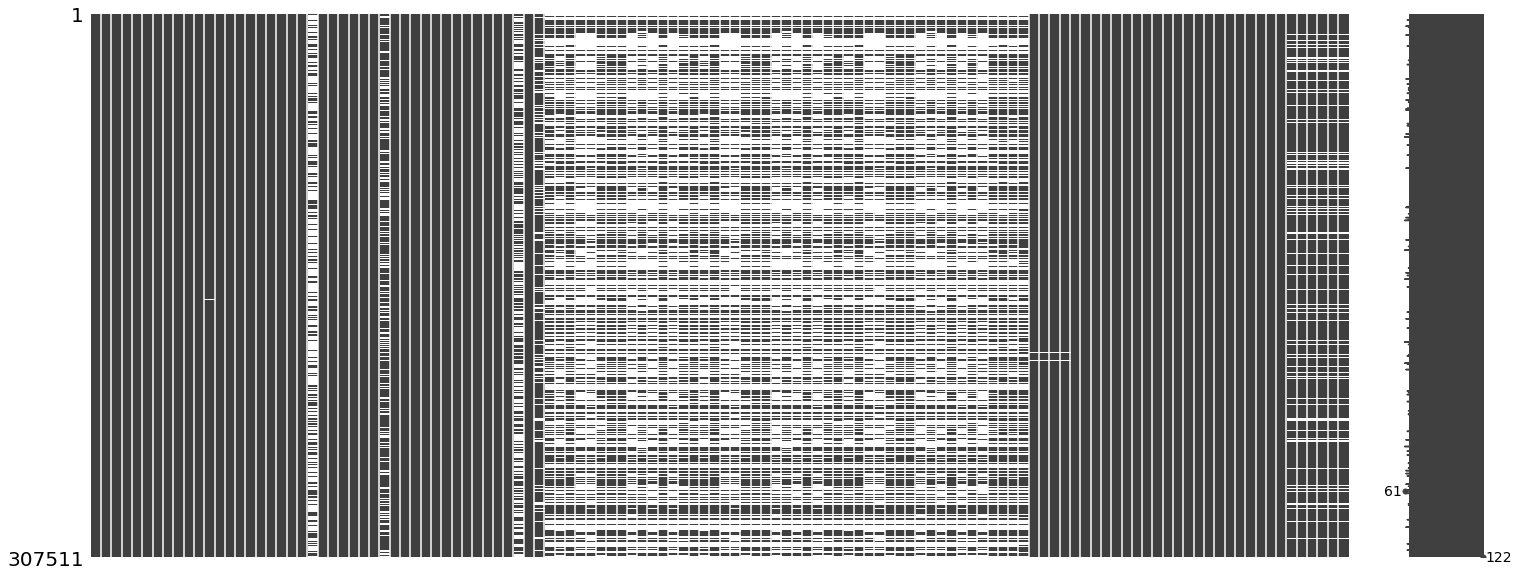

In [102]:
msno.matrix(df)

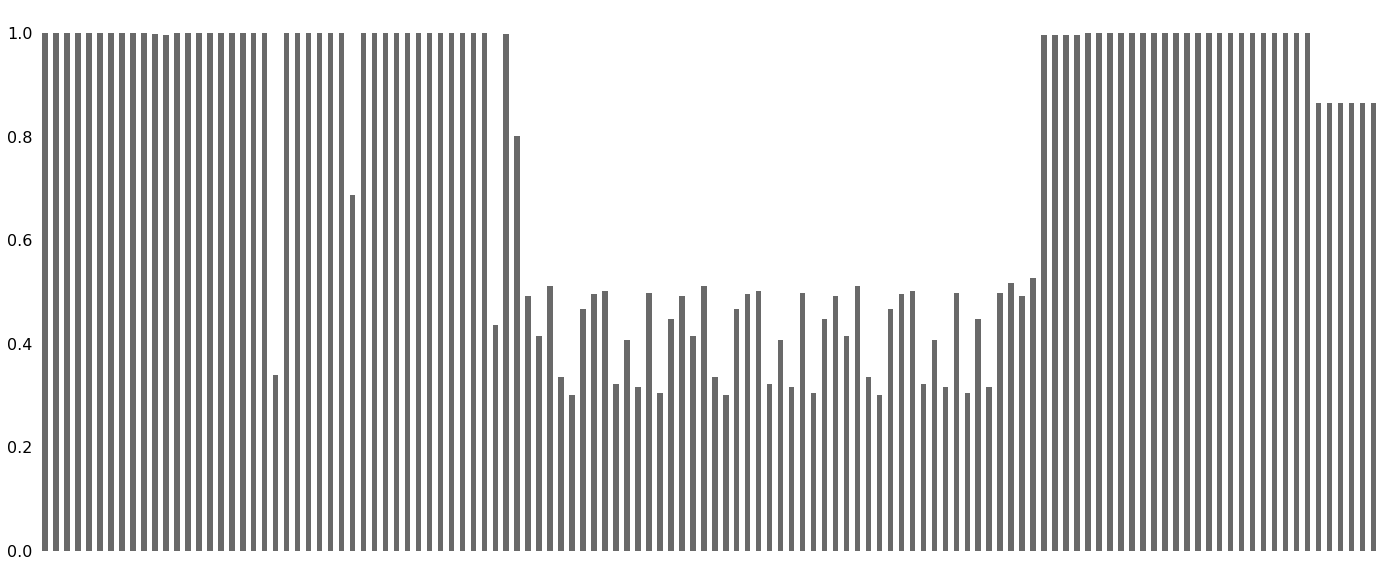

In [103]:
msno.bar(df)

欠損値が多い列がある。→分析に利用する列を要検討。

### クラスごとのデータ数をグラフに出す

In [104]:
display(df['TARGET'].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64

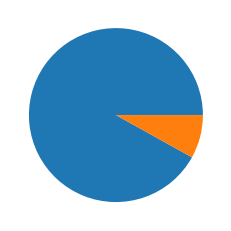

In [105]:
label_counts = df['TARGET'].value_counts()
plt.pie(label_counts, )
plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

- 9割方がtarget=0となっている→調整方法を確認
- 説明変数のうち、相関関数の高いものについては説明変数から除外する
- 説明変数の説明文を読んでデータ定性的内容を理解する
- 欠損値が多いので、分析に利用する特徴量で欠損値の多いものについては、処理を個別に検討。
- 説明変数について、カテゴリカルデータ、定量データかを把握する。  
  
以下、追加の仮説についてはデータ探索を実施しながら設定。  

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

#### ①先ずは変数ごとの相関係数を確認する。

In [106]:
df_corr = df.corr()

In [107]:
display(df_corr)

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   
TARGET                         -0.002108  1.000000      0.019187   
CNT_CHILDREN                   -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               -0.001820 -0.003982      0.012882   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
AMT_ANNUITY                    -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE                -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
DAYS_BIRTH                     -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION              -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                     0.001818  0.037612      0.008494   
FLAG_MOBIL                      0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE                0.002815  0.000370     -0.000794   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   
FLAG_EMAIL                      0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS                -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT           -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION     -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION      0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION     0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY         -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY         -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY         0.000067  0.032518      0.069957   
EXT_SOURCE_1                    0.000082 -0.155317     -0.138470   
EXT_SOURCE_2                    0.002342 -0.160472     -0.018015   
EXT_SOURCE_3                    0.000222 -0.178919     -0.042710   
APARTMENTS_AVG                  0.001556 -0.029498     -0.013222   
BASEMENTAREA_AVG               -0.002070 -0.022746     -0.008464   
YEARS_BEGINEXPLUATATION_AVG     0.001551 -0.009728      0.006902   
YEARS_BUILD_AVG                 0.005900 -0.022149      0.030172   
COMMONAREA_AVG                 -0.001463 -0.018550      0.000140   
ELEVATORS_AVG                   0.004862 -0.034199     -0.007060   
ENTRANCES_AVG                  -0.002879 -0.019172     -0.008341   
FLOORSMAX_AVG                   0.004851 -0.044003     -0.009705   
FLOORSMIN_AVG                   0.003083 -0.033614     -0.008753   
LANDAREA_AVG                    0.001465 -0.010885     -0.003121   
LIVINGAPARTMENTS_AVG            0.003119 -0.025031     -0.008648   
LIVINGAREA_AVG                  0.001770 -0.032997     -0.010116   
NONLIVINGAPARTMENTS_AVG        -0.002575 -0.003176      0.004051   
NONLIVINGAREA_AVG               0.003042 -0.013578      0.000028   
APARTMENTS_MODE                 0.001961 -0.027284     -0.012105   
BASEMENTAREA_MODE              -0.001411 -0.019952     -0.008513   
YEARS_BEGINEXPLUATATION_MODE    0.001890 -0.009036      0.006199   
YEARS_BUILD_MODE                0.005245 -0.022068      0.029549   
COMMONAREA_MODE                -0.001058 -0.016340      0.000440   
ELEVATORS_MODE                  0.005017 -0.032131     -0.006397   
ENTRANCES_MODE                 -0.002844 -0.017387     -0.006880   
FLOORSMAX_MODE                  0.004386 -0.043226     -0.009550   
FLOORSMIN_MODE                  0.002081 -0.032698     -0.008044   
LANDAREA_MODE                   0.001548 -0.010174     -0.002212   
LIVINGAPARTMENTS_MODE           0.003589 -0.023393     -0.007955   
LIVINGAREA_MODE                 0.002156 -0.030685     -0.009517   
NONLIVINGAPARTMENT

In [108]:
#TARGETでソート
df_corr.sort_values('TARGET')

SK_ID_CURR    TARGET  CNT_CHILDREN  \
EXT_SOURCE_3                    0.000222 -0.178919     -0.042710   
EXT_SOURCE_2                    0.002342 -0.160472     -0.018015   
EXT_SOURCE_1                    0.000082 -0.155317     -0.138470   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
FLOORSMAX_AVG                   0.004851 -0.044003     -0.009705   
FLOORSMAX_MEDI                  0.004588 -0.043768     -0.009447   
FLOORSMAX_MODE                  0.004386 -0.043226     -0.009550   
AMT_GOODS_PRICE                -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
ELEVATORS_AVG                   0.004862 -0.034199     -0.007060   
ELEVATORS_MEDI                  0.005067 -0.033863     -0.006747   
FLOORSMIN_AVG                   0.003083 -0.033614     -0.008753   
FLOORSMIN_MEDI                  0.002837 -0.033394     -0.008231   
LIVINGAREA_AVG                  0.001770 -0.032997     -0.010116   
LIVINGAREA_MEDI                 0.002205 -0.032739     -0.010067   
FLOORSMIN_MODE                  0.002081 -0.032698     -0.008044   
TOTALAREA_MODE                  0.002288 -0.032596     -0.008037   
ELEVATORS_MODE                  0.005017 -0.032131     -0.006397   
LIVINGAREA_MODE                 0.002156 -0.030685     -0.009517   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
APARTMENTS_AVG                  0.001556 -0.029498     -0.013222   
APARTMENTS_MEDI                 0.001988 -0.029184     -0.012985   
FLAG_DOCUMENT_6                 0.002121 -0.028602     -0.157024   
APARTMENTS_MODE                 0.001961 -0.027284     -0.012105   
LIVINGAPARTMENTS_AVG            0.003119 -0.025031     -0.008648   
LIVINGAPARTMENTS_MEDI           0.003272 -0.024621     -0.007962   
HOUR_APPR_PROCESS_START         0.000350 -0.024166     -0.007292   
FLAG_PHONE                      0.002753 -0.023806     -0.029906   
LIVINGAPARTMENTS_MODE           0.003589 -0.023393     -0.007955   
BASEMENTAREA_AVG               -0.002070 -0.022746     -0.008464   
YEARS_BUILD_MEDI                0.005777 -0.022326      0.030124   
YEARS_BUILD_AVG                 0.005900 -0.022149      0.030172   
BASEMENTAREA_MEDI              -0.001647 -0.022081     -0.008799   
YEARS_BUILD_MODE                0.005245 -0.022068      0.029549   
BASEMENTAREA_MODE              -0.001411 -0.019952     -0.008513   
ENTRANCES_AVG                  -0.002879 -0.019172     -0.008341   
ENTRANCES_MEDI                 -0.002583 -0.019025     -0.008325   
COMMONAREA_MEDI                -0.001036 -0.018573      0.000609   
COMMONAREA_AVG                 -0.001463 -0.018550      0.000140   
ENTRANCES_MODE                 -0.002844 -0.017387     -0.006880   
COMMONAREA_MODE                -0.001058 -0.016340      0.000440   
NONLIVINGAREA_AVG               0.003042 -0.013578      0.000028   
NONLIVINGAREA_MEDI              0.002440 -0.013337      0.000061   
AMT_ANNUITY                    -0.000433 -0.012817      0.021374   
NONLIVINGAREA_MODE              0.001920 -0.012711      0.000231   
AMT_REQ_CREDIT_BUREAU_MON       0.000485 -0.012462     -0.010808   
FLAG_DOCUMENT_16               -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_13                0.000896 -0.011583      0.003945   
LANDAREA_MEDI                   0.001699 -0.011256     -0.002820   
LANDAREA_AVG                    0.001465 -0.010885     -0.003121   
LANDAREA_MODE                   0.001548 -0.010174     -0.002212   
YEARS_BEGINEXPLUATATION_MEDI    0.001366 -0.009993      0.006401   
YEARS_BEGINEXPLUATATION_AVG     0.001551 -0.009728      0.006902   
FLAG_DOCUMENT_14               -0.001077 -0.009464     -0.005459   
YEARS_BEGINEXPLUATATION_MODE    0.001890 -0.009036      0.006199   
FLAG_DOCUMENT_8                 0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_18                0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_15                0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_9   

#### 考察：
説明変数と目的変数の相関を見ても「EXT_SOURCE_3：-0.178919」とかなり低い相関しか見えないので、単純にデータを見るだけては予測は難しそう。

#### ②とりあえず相関関係をヒートマップで見てみる   
   考察：やっぱり変数が多すぎて何も見えない

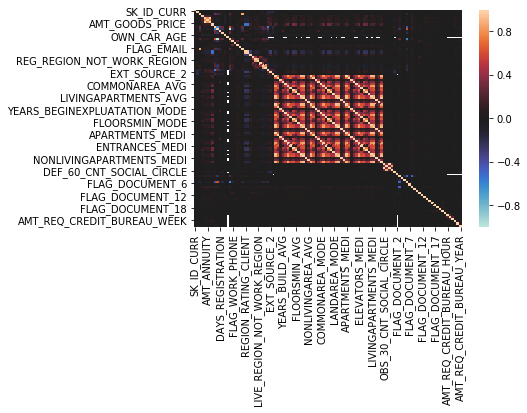

In [109]:
sns.heatmap(df_corr, vmax = 1, vmin = -1, center = 0)

#### ③説明変数同士の相関を確認(変数削減のため)

In [110]:
df_high_corr = df_corr[df_corr >= 0.8]

In [111]:
df_high_corr = df_high_corr[df_high_corr < 1.0]

In [112]:
#相関係数8割以上1以下の変数洗い出し
display(df_high_corr)

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                           NaN     NaN           NaN   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                         NaN     NaN           NaN   
AMT_INCOME_TOTAL                     NaN     NaN           NaN   
AMT_CREDIT                           NaN     NaN           NaN   
AMT_ANNUITY                          NaN     NaN           NaN   
AMT_GOODS_PRICE                      NaN     NaN           NaN   
REGION_POPULATION_RELATIVE           NaN     NaN           NaN   
DAYS_BIRTH                           NaN     NaN           NaN   
DAYS_EMPLOYED                        NaN     NaN           NaN   
DAYS_REGISTRATION                    NaN     NaN           NaN   
DAYS_ID_PUBLISH                      NaN     NaN           NaN   
OWN_CAR_AGE                          NaN     NaN           NaN   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                       NaN     NaN           NaN   
FLAG_WORK_PHONE                      NaN     NaN           NaN   
FLAG_CONT_MOBILE                     NaN     NaN           NaN   
FLAG_PHONE                           NaN     NaN           NaN   
FLAG_EMAIL                           NaN     NaN           NaN   
CNT_FAM_MEMBERS                      NaN     NaN      0.879161   
REGION_RATING_CLIENT                 NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY          NaN     NaN           NaN   
HOUR_APPR_PROCESS_START              NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION           NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION           NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY               NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY               NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
EXT_SOURCE_1                         NaN     NaN           NaN   
EXT_SOURCE_2                         NaN     NaN           NaN   
EXT_SOURCE_3                         NaN     NaN           NaN   
APARTMENTS_AVG                       NaN     NaN           NaN   
BASEMENTAREA_AVG                     NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN     NaN           NaN   
YEARS_BUILD_AVG                      NaN     NaN           NaN   
COMMONAREA_AVG                       NaN     NaN           NaN   
ELEVATORS_AVG                        NaN     NaN           NaN   
ENTRANCES_AVG                        NaN     NaN           NaN   
FLOORSMAX_AVG                        NaN     NaN           NaN   
FLOORSMIN_AVG                        NaN     NaN           NaN   
LANDAREA_AVG                         NaN     NaN           NaN   
LIVINGAPARTMENTS_AVG                 NaN     NaN           NaN   
LIVINGAREA_AVG                       NaN     NaN           NaN   
NONLIVINGAPARTMENTS_AVG              NaN     NaN           NaN   
NONLIVINGAREA_AVG                    NaN     NaN           NaN   
APARTMENTS_MODE                      NaN     NaN           NaN   
BASEMENTAREA_MODE                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN     NaN           NaN   
YEARS_BUILD_MODE                     NaN     NaN           NaN   
COMMONAREA_MODE                      NaN     NaN           NaN   
ELEVATORS_MODE                       NaN     NaN           NaN   
ENTRANCES_MODE                       NaN     NaN           NaN   
FLOORSMAX_MODE                       NaN     NaN           NaN   
FLOORSMIN_MODE                       NaN     NaN           NaN   
LANDAREA_MODE                        NaN     NaN           NaN   
LIVINGAPARTMENTS_MODE                NaN     NaN           NaN   
LIVINGAREA_MODE                      NaN     NaN           NaN   
NONLIVINGAPARTMENTS_MODE             NaN     NaN           NaN   
NONLIVINGAREA_MODE                   NaN     NaN           NaN   
APAR

In [113]:
display(df_high_corr.dropna(how='all', axis=1))

CNT_CHILDREN  AMT_CREDIT  AMT_GOODS_PRICE  \
SK_ID_CURR                             NaN         NaN              NaN   
TARGET                                 NaN         NaN              NaN   
CNT_CHILDREN                           NaN         NaN              NaN   
AMT_INCOME_TOTAL                       NaN         NaN              NaN   
AMT_CREDIT                             NaN         NaN         0.986968   
AMT_ANNUITY                            NaN         NaN              NaN   
AMT_GOODS_PRICE                        NaN    0.986968              NaN   
REGION_POPULATION_RELATIVE             NaN         NaN              NaN   
DAYS_BIRTH                             NaN         NaN              NaN   
DAYS_EMPLOYED                          NaN         NaN              NaN   
DAYS_REGISTRATION                      NaN         NaN              NaN   
DAYS_ID_PUBLISH                        NaN         NaN              NaN   
OWN_CAR_AGE                            NaN         NaN              NaN   
FLAG_MOBIL                             NaN         NaN              NaN   
FLAG_EMP_PHONE                         NaN         NaN              NaN   
FLAG_WORK_PHONE                        NaN         NaN              NaN   
FLAG_CONT_MOBILE                       NaN         NaN              NaN   
FLAG_PHONE                             NaN         NaN              NaN   
FLAG_EMAIL                             NaN         NaN              NaN   
CNT_FAM_MEMBERS                   0.879161         NaN              NaN   
REGION_RATING_CLIENT                   NaN         NaN              NaN   
REGION_RATING_CLIENT_W_CITY            NaN         NaN              NaN   
HOUR_APPR_PROCESS_START                NaN         NaN              NaN   
REG_REGION_NOT_LIVE_REGION             NaN         NaN              NaN   
REG_REGION_NOT_WORK_REGION             NaN         NaN              NaN   
LIVE_REGION_NOT_WORK_REGION            NaN         NaN              NaN   
REG_CITY_NOT_LIVE_CITY                 NaN         NaN              NaN   
REG_CITY_NOT_WORK_CITY                 NaN         NaN              NaN   
LIVE_CITY_NOT_WORK_CITY                NaN         NaN              NaN   
EXT_SOURCE_1                           NaN         NaN              NaN   
EXT_SOURCE_2                           NaN         NaN              NaN   
EXT_SOURCE_3                           NaN         NaN              NaN   
APARTMENTS_AVG                         NaN         NaN              NaN   
BASEMENTAREA_AVG                       NaN         NaN              NaN   
YEARS_BEGINEXPLUATATION_AVG            NaN         NaN              NaN   
YEARS_BUILD_AVG                        NaN         NaN              NaN   
COMMONAREA_AVG                         NaN         NaN              NaN   
ELEVATORS_AVG                          NaN         NaN              NaN   
ENTRANCES_AVG                          NaN         NaN              NaN   
FLOORSMAX_AVG                          NaN         NaN              NaN   
FLOORSMIN_AVG                          NaN         NaN              NaN   
LANDAREA_AVG                           NaN         NaN              NaN   
LIVINGAPARTMENTS_AVG                   NaN         NaN              NaN   
LIVINGAREA_AVG                         NaN         NaN              NaN   
NONLIVINGAPARTMENTS_AVG                NaN         NaN              NaN   
NONLIVINGAREA_AVG                      NaN         NaN              NaN   
APARTMENTS_MODE                        NaN         NaN              NaN   
BASEMENTAREA_MODE                      NaN         NaN              NaN   
YEARS_BEGINEXPLUATATION_MODE           NaN         NaN              NaN   
YEARS_BUILD_MODE                       NaN         NaN              NaN   
COMMONAREA_MODE                        NaN         NaN              NaN   
ELEVATORS_MODE                         NaN         NaN              NaN   
ENTRANCES_MODE                         NaN         NaN 

57colums(なぜ奇数・・？)と多いので9.8割以上にしてみる

In [114]:
df_high_corr_9 = df_corr[df_corr >= 0.98]

In [115]:
df_high_corr_9 = df_high_corr_9[df_high_corr_9 < 1.0]

In [116]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 110)
display(df_high_corr_9.dropna(how='all').dropna(how='all', axis=1))

AMT_CREDIT  AMT_GOODS_PRICE  APARTMENTS_AVG  \
AMT_CREDIT                           NaN         0.986968             NaN   
AMT_GOODS_PRICE                 0.986968              NaN             NaN   
APARTMENTS_AVG                       NaN              NaN             NaN   
BASEMENTAREA_AVG                     NaN              NaN             NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN              NaN             NaN   
YEARS_BUILD_AVG                      NaN              NaN             NaN   
COMMONAREA_AVG                       NaN              NaN             NaN   
ELEVATORS_AVG                        NaN              NaN             NaN   
ENTRANCES_AVG                        NaN              NaN             NaN   
FLOORSMAX_AVG                        NaN              NaN             NaN   
FLOORSMIN_AVG                        NaN              NaN             NaN   
LANDAREA_AVG                         NaN              NaN             NaN   
LIVINGAPARTMENTS_AVG                 NaN              NaN             NaN   
LIVINGAREA_AVG                       NaN              NaN             NaN   
NONLIVINGAPARTMENTS_AVG              NaN              NaN             NaN   
NONLIVINGAREA_AVG                    NaN              NaN             NaN   
YEARS_BUILD_MODE                     NaN              NaN             NaN   
ELEVATORS_MODE                       NaN              NaN             NaN   
ENTRANCES_MODE                       NaN              NaN             NaN   
FLOORSMAX_MODE                       NaN              NaN             NaN   
FLOORSMIN_MODE                       NaN              NaN             NaN   
LANDAREA_MODE                        NaN              NaN             NaN   
APARTMENTS_MEDI                      NaN              NaN        0.995081   
BASEMENTAREA_MEDI                    NaN              NaN             NaN   
YEARS_BEGINEXPLUATATION_MEDI         NaN              NaN             NaN   
YEARS_BUILD_MEDI                     NaN              NaN             NaN   
COMMONAREA_MEDI                      NaN              NaN             NaN   
ELEVATORS_MEDI                       NaN              NaN             NaN   
ENTRANCES_MEDI                       NaN              NaN             NaN   
FLOORSMAX_MEDI                       NaN              NaN             NaN   
FLOORSMIN_MEDI                       NaN              NaN             NaN   
LANDAREA_MEDI                        NaN              NaN             NaN   
LIVINGAPARTMENTS_MEDI                NaN              NaN             NaN   
LIVINGAREA_MEDI                      NaN              NaN             NaN   
NONLIVINGAPARTMENTS_MEDI             NaN              NaN             NaN   
NONLIVINGAREA_MEDI                   NaN              NaN             NaN   
OBS_30_CNT_SOCIAL_CIRCLE             NaN              NaN             NaN   
OBS_60_CNT_SOCIAL_CIRCLE             NaN              NaN             NaN   

                              BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
AMT_CREDIT                                 NaN                          NaN   
AMT_GOODS_PRICE                            NaN                          NaN   
APARTMENTS_AVG                             NaN                          NaN   
BASEMENTAREA_AVG                           NaN                          NaN   
YEARS_BEGINEXPLUATATION_AVG                NaN                          NaN   
YEARS_BUILD_AVG                            NaN                          NaN   
COMMONAREA_AVG                             NaN                          NaN   
ELEVATORS_AVG                              NaN                          NaN   
ENTRANCES_AVG                              NaN                          NaN   
FLOORSMAX_AVG                              NaN                          NaN   
FLOORSMIN_AVG                              NaN                          NaN   
LANDAREA_AVG                               NaN                          NaN   

#### 考察：
AMT_CREDIT:AMT_GOODS_PRICE  0.986968
APARTMENTS_AVG:APARTMENTS_MEDI 0.995081
BASEMENTAREA_AVG:BASEMENTAREA_MEDI 0.994317
YEARS_BEGINEXPLUATATION_MEDI:YEARS_BEGINEXPLUATATION_AVG 0.993825
YEARS_BUILD_AVG: YEARS_BUILD_MODE 0.989444
COMMONAREA_AVG:COMMONAREA_MEDI  0.995978
ELEVATORS_AVG:ELEVATORS_MEDI 0.996099
ENTRANCES_AVG: ENTRANCES_MEDI 0.996886
FLOORSMAX_AVG: FLOORSMAX_MEDI 0.985689

など、同じ変数のアベレージとMEDI、MODEの変数が別々に用意されているものが当たり前に相関しているので、いずれかの変数を利用するほうが良さそう。

#### ④欠損値比率の高い説明変数の確認

In [117]:
df_nullcheck_bool = df.isnull()
df_nullcheck_sum = df_nullcheck_bool.sum()
df_nullcheck_count =df_nullcheck_bool.count()
df_nullcheck_percent = df_nullcheck_sum / df_nullcheck_count
df_nullcheck = pd.concat([df_nullcheck_count, df_nullcheck_sum, df_nullcheck_percent], axis = 1)
df_nullcheck.sort_values(by=1,ascending=False)

0       1         2
COMMONAREA_MEDI               307511  214865  0.698723
COMMONAREA_AVG                307511  214865  0.698723
COMMONAREA_MODE               307511  214865  0.698723
NONLIVINGAPARTMENTS_MODE      307511  213514  0.694330
NONLIVINGAPARTMENTS_AVG       307511  213514  0.694330
NONLIVINGAPARTMENTS_MEDI      307511  213514  0.694330
FONDKAPREMONT_MODE            307511  210295  0.683862
LIVINGAPARTMENTS_MODE         307511  210199  0.683550
LIVINGAPARTMENTS_AVG          307511  210199  0.683550
LIVINGAPARTMENTS_MEDI         307511  210199  0.683550
FLOORSMIN_AVG                 307511  208642  0.678486
FLOORSMIN_MODE                307511  208642  0.678486
FLOORSMIN_MEDI                307511  208642  0.678486
YEARS_BUILD_MEDI              307511  204488  0.664978
YEARS_BUILD_MODE              307511  204488  0.664978
YEARS_BUILD_AVG               307511  204488  0.664978
OWN_CAR_AGE                   307511  202929  0.659908
LANDAREA_MEDI                 307511  182590  0.593767
LANDAREA_MODE                 307511  182590  0.593767
LANDAREA_AVG                  307511  182590  0.593767
BASEMENTAREA_MEDI             307511  179943  0.585160
BASEMENTAREA_AVG              307511  179943  0.585160
BASEMENTAREA_MODE             307511  179943  0.585160
EXT_SOURCE_1                  307511  173378  0.563811
NONLIVINGAREA_MODE            307511  169682  0.551792
NONLIVINGAREA_AVG             307511  169682  0.551792
NONLIVINGAREA_MEDI            307511  169682  0.551792
ELEVATORS_MEDI                307511  163891  0.532960
ELEVATORS_AVG                 307511  163891  0.532960
ELEVATORS_MODE                307511  163891  0.532960
WALLSMATERIAL_MODE            307511  156341  0.508408
APARTMENTS_MEDI               307511  156061  0.507497
APARTMENTS_AVG                307511  156061  0.507497
APARTMENTS_MODE               307511  156061  0.507497
ENTRANCES_MEDI                307511  154828  0.503488
ENTRANCES_AVG                 307511  154828  0.503488
ENTRANCES_MODE                307511  154828  0.503488
LIVINGAREA_AVG                307511  154350  0.501933
LIVINGAREA_MODE               307511  154350  0.501933
LIVINGAREA_MEDI               307511  154350  0.501933
HOUSETYPE_MODE                307511  154297  0.501761
FLOORSMAX_MODE                307511  153020  0.497608
FLOORSMAX_MEDI                307511  153020  0.497608
FLOORSMAX_AVG                 307511  153020  0.497608
YEARS_BEGINEXPLUATATION_MODE  307511  150007  0.487810
YEARS_BEGINEXPLUATATION_MEDI  307511  150007  0.487810
YEARS_BEGINEXPLUATATION_AVG   307511  150007  0.487810
TOTALAREA_MODE                307511  148431  0.482685
EMERGENCYSTATE_MODE           307511  145755  0.473983
OCCUPATION_TYPE               307511   96391  0.313455
EXT_SOURCE_3                  307511   60965  0.198253
AMT_REQ_CREDIT_BUREAU_HOUR    307511   41519  0.135016
AMT_REQ_CREDIT_BUREAU_DAY     307511   41519  0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    307511   41519  0.135016
AMT_REQ_CREDIT_BUREAU_MON     307511   41519  0.135016
...                              ...     ...       ...
CNT_CHILDREN                  307511       0  0.000000
FLAG_DOCUMENT_8               307511       0  0.000000
NAME_CONTRACT_TYPE            307511       0  0.000000
CODE_GENDER                   307511       0  0.000000
FLAG_OWN_CAR                  307511       0  0.000000
FLAG_DOCUMENT_2               307511       0  0.000000
FLAG_DOCUMENT_3               307511       0  0.000000
FLAG_DOCUMENT_4               307511       0  0.000000
FLAG_DOCUMENT_5               307511       0  0.000000
FLAG_DOCUMENT_6               307511       0  0.000000
FLAG_DOCUMENT_7               307511       0  0.000000
FLAG_DOCUMENT_9               307511       0  0.000000
FLAG_DOCUMENT_21              307511       0  0.000000
FLAG_DOCUMENT_10              307511       0  0.000000
FLAG_DOCUMENT_11              307511       0  0.000000
FLAG_OWN_REALTY               307511       0  0.000000
FLAG_DOCUMENT_13    

In [118]:
df_nullcheck_bool

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
5            False   False               False        False         False   
6            False   False               False        False         False   
7            False   False               False        False         False   
8            False   False               False        False         False   
9            False   False               False        False         False   
10           False   False               False        False         False   
11           False   False               False        False         False   
12           False   False               False        False         False   
13           False   False               False        False         False   
14           False   False               False        False         False   
15           False   False               False        False         False   
16           False   False               False        False         False   
17           False   False               False        False         False   
18           False   False               False        False         False   
19           False   False               False        False         False   
20           False   False               False        False         False   
21           False   False               False        False         False   
22           False   False               False        False         False   
23           False   False               False        False         False   
24           False   False               False        False         False   
25           False   False               False        False         False   
26           False   False               False        False         False   
27           False   False               False        False         False   
28           False   False               False        False         False   
29           False   False               False        False         False   
30           False   False               False        False         False   
31           False   False               False        False         False   
32           False   False               False        False         False   
33           False   False               False        False         False   
34           False   False               False        False         False   
35           False   False               False        False         False   
36           False   False               False        False         False   
37           False   False               False        False         False   
38           False   False               False        False         False   
39           False   False               False        False         False   
40           False   False               False        False         False   
41           False   False               False        False         False   
42           False   False               False        False         False   
43           False   False               False        False         False   
44           False   False               False        False         False   
45           False   False               False        False         False   
46           False   False               False        False         False   
47           False   False               False        False         False   
48           False   False               False        False         False   
49           False   False               False        False         False   
50           False   False               False        False         False   
51  

In [119]:
'''
sns.pairplot(df, hue = 'TARGET')
plt.legend()
plt.show()
'''

"\nsns.pairplot(df, hue = 'TARGET')\nplt.legend()\nplt.show()\n"

In [120]:
df.groupby('TARGET').count()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
TARGET                                                              
0           282686              282686       282686        282686   
1            24825               24825        24825         24825   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                                
0                282686        282686            282686      282686   
1                 24825         24825             24825       24825   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
TARGET                                                                    
0            282674           282429           281464            282686   
1             24825            24804            24755             24825   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
TARGET                                                               
0                    282686              282686             282686   
1                     24825               24825              24825   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                                          
0                           282686      282686         282686   
1                            24825       24825          24825   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  FLAG_DOCUMENT_8  \
TARGET                                      ...                    
0                  282686           282686  ...           282686   
1                   24825            24825  ...            24825   

        FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
TARGET                                                                          
0                282686            282686            282686            282686   
1                 24825             24825             24825             24825   

        FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
TARGET                                                         
0                 282686            282686            282686   
1                  24825             24825             24825   

        FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
TARGET                                                         
0                 282686            282686            282686   
1                  24825             24825             24825   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
TARGET                                                         
0                 282686            282686            282686   
1                  24825             24825             24825   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
TARGET                                                          
0                           245459                     245459   
1                            20533                      20533   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
TARGET                                                          
0                           245459                     245459   
1                            20533                      20533   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
TARGET                                                         
0                          245459                      245459  
1                           20533                       20533  

[2 rows x 121 columns]

In [121]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### 仮説：　DAYS_EMPLOYEDがプラスの人は、貸倒(TARGET=1)リスクが高い(授業内のペアプロにて検証)

In [122]:
pd.crosstab(df['TARGET'],df['NAME_EDUCATION_TYPE'])

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
TARGET                                                                      
0                                161             70854               9405   
1                                  3              4009                872   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
TARGET                                                               
0                               3399                         198867  
1                                417                          19524

In [123]:
pd.crosstab(df['TARGET'],df['DAYS_EMPLOYED'])

DAYS_EMPLOYED  -17912   -17583   -17546   -17531   -17522   -17170   -17139   \
TARGET                                                                         
0                    1        1        1        1        1        1        1   
1                    0        0        0        0        0        0        0   

DAYS_EMPLOYED  -16852   -16849   -16836   -16767   -16678   -16651   -16632   \
TARGET                                                                         
0                    1        1        1        1        1        1        1   
1                    0        0        0        0        0        0        0   

DAYS_EMPLOYED  -16607   -16554   -16538   -16499   -16495   -16492   ...  \
TARGET                                                               ...   
0                    1        1        1        1        2        1  ...   
1                    0        0        0        0        0        0  ...   

DAYS_EMPLOYED  -18      -17      -16      -15      -14      -13      -12      \
TARGET                                                                         
0                    3        4        4        4        3        3        6   
1                    0        1        3        2        0        0        0   

DAYS_EMPLOYED  -11      -10      -9       -8       -7       -6       -5       \
TARGET                                                                         
0                    2        1        1        2        0        2        1   
1                    0        0        2        0        1        0        0   

DAYS_EMPLOYED  -4       -3       -2       -1        0        365243  
TARGET                                                               
0                    3        3        1        1        1    52384  
1                    1        0        1        0        1     2990  

[2 rows x 12574 columns]

(array([1.18000e+02, 7.71000e+02, 2.39600e+03, 4.60000e+03, 1.01760e+04,
        2.58180e+04, 7.59910e+04, 1.32262e+05, 0.00000e+00, 0.00000e+00]),
 array([-17500., -15250., -13000., -10750.,  -8500.,  -6250.,  -4000.,
         -1750.,    500.,   2750.,   5000.]),
 <a list of 10 Patch objects>)

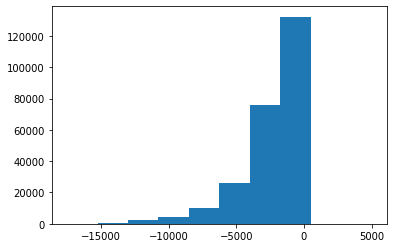

In [124]:
plt.hist(df['DAYS_EMPLOYED'],range=(-17500, 5000))

In [125]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 55374.]),
 array([ 30000. ,  63524.3,  97048.6, 130572.9, 164097.2, 197621.5,
        231145.8, 264670.1, 298194.4, 331718.7, 365243. ]),
 <a list of 10 Patch objects>)

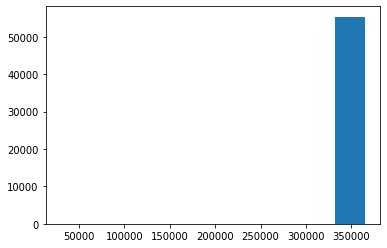

In [126]:
plt.hist(df['DAYS_EMPLOYED'],range=(30000, 365243))

In [127]:
working = df['DAYS_EMPLOYED'][df['DAYS_EMPLOYED'] < 0]

In [128]:
not_working = df['DAYS_EMPLOYED'][df['DAYS_EMPLOYED'] >= 0]

In [129]:
df_new = df.assign(CATEGORY_DAYS_EMPLOYED=0)

In [130]:
df_new['CATEGORY_DAYS_EMPLOYED'][df_new['DAYS_EMPLOYED'] > 0] = 1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
16          100020       0         Cash loans           M            N   
17          100021       0    Revolving loans           F            N   
18          100022       0    Revolving loans           F            N   
19          100023       0         Cash loans           F            N   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
22          100026       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
24          100029       0         Cash loans           M            Y   
25          100030       0         Cash loans           F            N   
26          100031       1         Cash loans           F            N   
27          100032       0         Cash loans           M            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
30          100035       0         Cash loans           F            N   
31          100036       0         Cash loans           F            N   
32          100037       0         Cash loans           F            N   
33          100039       0         Cash loans           M            Y   
34          100040       0         Cash loans           F            N   
35          100041       0         Cash loans           F            N   
36          100043       0         Cash loans           F            N   
37          100044       0         Cash loans           M            N   
38          100045       0         Cash loans           F            N   
39          100046       0    Revolving loans           M            Y   
40          100047       1         Cash loans           M            N   
41          100048       0         Cash loans           F            N   
42          100049       1         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
44          100051       0         Cash loans           M            N   
45          100052       0    Revolving loans           F            N   
46          100053       0         Cash loans           F            N   
47          100054       0         Cash loans           F            N   
48          100055       0         Cash loans           F            N   
49          100056       0         Cash loans           M            Y   
50          100058       0    Revolving loans           F            N   
51          100059       0         Cash loans           M            Y   
52          100060       0         Cash loans           M            Y   
53          

In [132]:
df_new2 = df_new.loc[:,['TARGET','DAYS_EMPLOYED','CATEGORY_DAYS_EMPLOYED']]

In [133]:
pd.crosstab(index=df_new2['TARGET'],columns=df_new2['CATEGORY_DAYS_EMPLOYED'])

CATEGORY_DAYS_EMPLOYED       0      1
TARGET                               
0                       230302  52384
1                        21835   2990

In [134]:
21835/(230302+21835)

0.0865997453765215

In [135]:
2990/(52384+2990)

0.05399646043269404

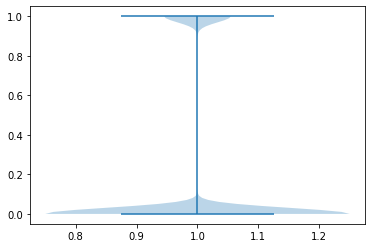

In [136]:
plt.violinplot(df_new2['CATEGORY_DAYS_EMPLOYED'])
plt.show()

#### 結論：仮説は支持されなかった

#### ⑥直感で関連しそうな変数をTARGET0と1でプロットして眺めてみる

羅列：  
CODE_GENDER  

<お金の有無とローンの有無が見えそう>  
FLAG_OWN_CAR
FLAG_OWN_REALTY

<費用がかかってそうなことが見えそう>  
CNT_CHILDREN
AMT_CREDIT :Credit amount of the loan
AMT_ANNUITY :Loan annuity
AMT_GOODS_PRICE:For consumer loans it is the price of the goods for which the loan is given![image.png]

<お金の有無見えそう>  
AMT_INCOME_TOTAL

<その人の状況が見えそう>  
NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE:Clients income type (businessman, working, maternity leave,
NAME_EDUCATION_TYPE  
NAME_FAMILY_STATUS  
NAME_HOUSING_TYPE  
OCCUPATION_TYPE  
CNT_FAM_MEMBERS:How many family members does client have  

FLAG_PHONE  
FLAG_EMAIL  

<ローンを受けるときに関して何か見えそう>
HOUR_APPR_PROCESS_START Approximately at what hour did the client apply for the loan  

CNT_CREDIT_PROLONG　How many times was the Credit Bureau credit prolonged信用調査機関の信用は何回延長されましたか  

<お金の利用状態見えそう>
AMT_PAYMENT_CURRENT  
AMT_PAYMENT_TOTAL_CURRENT  

後半疲れて色々飛ばしてそう・・・

**関連しそうな変数が文字列データが多いから利用できるように変換する方法考えてみる**

参考:  
https://qiita.com/nanairoGlasses/items/339ed9cb6297a1cb81bd  
データの特徴量が文字列であるとき、個々のデータ（カテゴリ変数）をダミー変数に置き換える方法が用いられる。これを One-hot-Encoding という。

pandas の get_dummies メソッドを使用することで、文字列など数値ではないデータを列の項目として置き換え、1 or 0 の値で表示することができる

https://qiita.com/takuya_tsurumi/items/53b9e3f7427b631b17cf  
Category Encodersでカテゴリ特徴量をストレスなく変換する  
↑  
これ使った


In [137]:
#とりあえず簡単そうなジェンダーから
import pandas as pd

# 元データ。要素として文字列が含まれている
data1 = pd.DataFrame({'性別':['M', 'F']})
print(data1)

# 文字列（カテゴリ変数）をダミー変数に変換
new_data1 = pd.get_dummies(data1)
print(new_data1)

  性別
0  M
1  F
   性別_F  性別_M
0     0     1
1     1     0


In [138]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [139]:
import category_encoders as ce

In [140]:

# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
             ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
             ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
             ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')

# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

In [141]:
pd.set_option('display.max_columns', 260)
display(df_gender_onehot)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_1  NAME_CONTRACT_TYPE_2  \
0           100002       1                     1                     0   
1           100003       0                     1                     0   
2           100004       0                     0                     1   
3           100006       0                     1                     0   
4           100007       0                     1                     0   
5           100008       0                     1                     0   
6           100009       0                     1                     0   
7           100010       0                     1                     0   
8           100011       0                     1                     0   
9           100012       0                     0                     1   
10          100014       0                     1                     0   
11          100015       0                     1                     0   
12          100016       0                     1                     0   
13          100017       0                     1                     0   
14          100018       0                     1                     0   
15          100019       0                     1                     0   
16          100020       0                     1                     0   
17          100021       0                     0                     1   
18          100022       0                     0                     1   
19          100023       0                     1                     0   
20          100024       0                     0                     1   
21          100025       0                     1                     0   
22          100026       0                     1                     0   
23          100027       0                     1                     0   
24          100029       0                     1                     0   
25          100030       0                     1                     0   
26          100031       1                     1                     0   
27          100032       0                     1                     0   
28          100033       0                     1                     0   
29          100034       0                     0                     1   
30          100035       0                     1                     0   
31          100036       0                     1                     0   
32          100037       0                     1                     0   
33          100039       0                     1                     0   
34          100040       0                     1                     0   
35          100041       0                     1                     0   
36          100043       0                     1                     0   
37          100044       0                     1                     0   
38          100045       0                     1                     0   
39          100046       0                     0                     1   
40          100047       1                     1                     0   
41          100048       0                     1                     0   
42          100049       1                     1                     0   
43          100050       0                     1                     0   
44          100051       0                     1                     0   
45          100052       0                     0                     1   
46          100053       0                     1                     0   
47          100054       0                     1                     0   
48          100055       0                     1                     0   
49          100056       0                     1                     0   
50          100058       0                     0                     1   
51          100059       0                     1                     0   
52          100060       0                     1                     0   
53          

In [142]:
display(df_gender_onehot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 266 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(201)
memory usage: 624.1 MB


None

In [143]:
#label_counts = df_gender_onehot.CODE_GENDER_1['TARGET'].value_counts()
#plt.pie(label_counts, )
#plt.show()

In [144]:
display(df_gender_onehot['CODE_GENDER_1'].value_counts())

0    202452
1    105059
Name: CODE_GENDER_1, dtype: int64

In [145]:
df_gender_onehot.groupby('TARGET').count()

SK_ID_CURR  NAME_CONTRACT_TYPE_1  NAME_CONTRACT_TYPE_2  CODE_GENDER_1  \
TARGET                                                                          
0           282686                282686                282686         282686   
1            24825                 24825                 24825          24825   

        CODE_GENDER_2  CODE_GENDER_3  FLAG_OWN_CAR_1  FLAG_OWN_CAR_2  \
TARGET                                                                 
0              282686         282686          282686          282686   
1               24825          24825           24825           24825   

        FLAG_OWN_REALTY_1  FLAG_OWN_REALTY_2  CNT_CHILDREN_1  CNT_CHILDREN_2  \
TARGET                                                                         
0                  282686             282686          282686          282686   
1                   24825              24825           24825           24825   

        CNT_CHILDREN_3  CNT_CHILDREN_4  CNT_CHILDREN_5  CNT_CHILDREN_6  \
TARGET                                                                   
0               282686          282686          282686          282686   
1                24825           24825           24825           24825   

        CNT_CHILDREN_7  CNT_CHILDREN_8  CNT_CHILDREN_9  CNT_CHILDREN_10  \
TARGET                                                                    
0               282686          282686          282686           282686   
1                24825           24825           24825            24825   

        CNT_CHILDREN_11  CNT_CHILDREN_12  CNT_CHILDREN_13  CNT_CHILDREN_14  \
TARGET                                                                       
0                282686           282686           282686           282686   
1                 24825            24825            24825            24825   

        CNT_CHILDREN_15  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
TARGET                                                               
0                282686            282686      282686       282674   
1                 24825             24825       24825        24825   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE_1  NAME_TYPE_SUITE_2  \
TARGET                                                          
0                282429             282686             282686   
1                 24804              24825              24825   

        NAME_TYPE_SUITE_3  NAME_TYPE_SUITE_4  NAME_TYPE_SUITE_5  \
TARGET                                                            
0                  282686             282686             282686   
1                   24825              24825              24825   

        NAME_TYPE_SUITE_6  NAME_TYPE_SUITE_7  NAME_TYPE_SUITE_8  \
TARGET                                                            
0                  282686             282686             282686   
1                   24825              24825              24825   

        NAME_INCOME_TYPE_1  NAME_INCOME_TYPE_2  NAME_INCOME_TYPE_3  \
TARGET                                                               
0                   282686              282686              282686   
1                    24825               24825               24825   

        NAME_INCOME_TYPE_4  NAME_INCOME_TYPE_5  NAME_INCOME_TYPE_6  \
TARGET                                                               
0                   282686              282686              282686   
1                    24825               24825               24825   

        NAME_INCOME_TYPE_7  NAME_INCOME_TYPE_8  NAME_EDUCATION_TYPE_1  \
TARGET                                                                  
0                   282686              282686                 282686   
1                    24825               24825                  24825   

        NAME_EDUCATION_TYPE_2  NAME_EDUCATION_TYPE_3  NAME_EDUCATION_TYPE_4  \
TARGET                                                                        
0                      282686                 282686                 

#### 仮説：女性と男性で差が発生しているはず

In [146]:
#TARGET1でCODE_GENDER1=1 （男性）
t1gm=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_1"]==1][df_gender_onehot["TARGET"]==1].count()

In [147]:
#TARGET1でCODE_GENDER2=1 (女性)
t1gf=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_2"]==1][df_gender_onehot["TARGET"]==1].count()

In [148]:
#TARGET1でCODE_GENDER３=1 (その他)
t1gn=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_3"]==1][df_gender_onehot["TARGET"]==1].count()

In [149]:
#TARGET0でCODE_GENDER1=1 （男性）
t0gm=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_1"]==1][df_gender_onehot["TARGET"]==0].count()

In [150]:
#TARGET1でCODE_GENDER2=1 (女性)
t0gf=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_2"]==1][df_gender_onehot["TARGET"]==0].count()

In [151]:
#TARGET1でCODE_GENDER３=1 (その他)
t0gn=df_gender_onehot.TARGET[df_gender_onehot["CODE_GENDER_3"]==1][df_gender_onehot["TARGET"]==0].count()

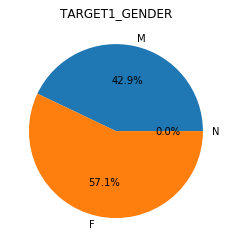

In [152]:
t1 = [t1gm,t1gf,t1gn]
label = ["M", "F", "N"]
plt.pie(t1, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_GENDER')
plt.show()

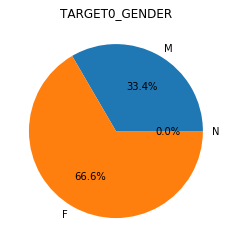

In [153]:
label = ["M", "F", "N"]

t0 = [t0gm,t0gf,t0gn]
plt.pie(t0, labels=label,autopct="%1.1f%%")


plt.title('TARGET0_GENDER')
plt.show()

#### TARGET0の女性の割合が大きいかも

#### 仮説：車や資産を所有しているとお金の余裕があるはず＝ローンの返済も滞らないはず

In [154]:
#車の所有
#TARGET1でFLAG_OWN_CAR_1=1(NO)
t1c1=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_CAR_1"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でFLAG_OWN_CAR_2=1(YES)
t1c2=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_CAR_2"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET0でFLAG_OWN_CAR_1=1(NO)
t0c1=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_CAR_1"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でFLAG_OWN_CAR_2=1(YES)
t0c2=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_CAR_2"]==1][df_gender_onehot["TARGET"]==0].count()


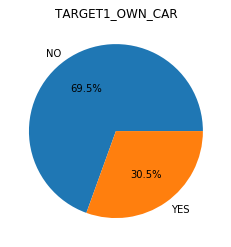

In [155]:
t1c = [t1c1,t1c2]
label = ["NO", "YES"]
plt.pie(t1c, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_OWN_CAR')
plt.show()

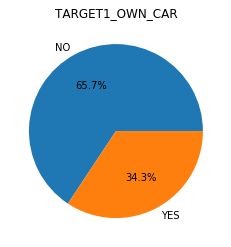

In [156]:
t0c = [t0c1,t0c2]
label = ["NO", "YES"]
plt.pie(t0c, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_OWN_CAR')
plt.show()

#### 仮説：資産を所有しているとお金の余裕があるはず＝ローンの返済も滞らないはず

In [157]:
#FLAG_OWN_REALTY
#TARGET1でFLAG_OWN_REALTY_1=1(NO)
t1r1=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_REALTY_1"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でFLAG_OWN_REALTY_2=1(YES)
t1r2=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_REALTY_2"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET0でFLAG_OWN_REALTY_1=1(NO)
t0r1=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_REALTY_1"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でFLAG_OWN_REALTY_2=1(YES)
t0r2=df_gender_onehot.TARGET[df_gender_onehot["FLAG_OWN_REALTY_2"]==1][df_gender_onehot["TARGET"]==0].count()



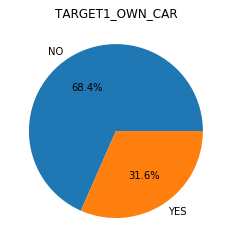

In [158]:
t1r = [t1r1,t1r2]
label = ["NO", "YES"]
plt.pie(t1r, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_OWN_CAR')
plt.show()

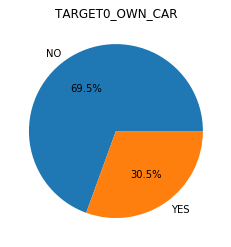

In [159]:
t0r = [t0r1,t0r2]
label = ["NO", "YES"]
plt.pie(t0r, labels=label,autopct="%1.1f%%")

plt.title('TARGET0_OWN_CAR')
plt.show()

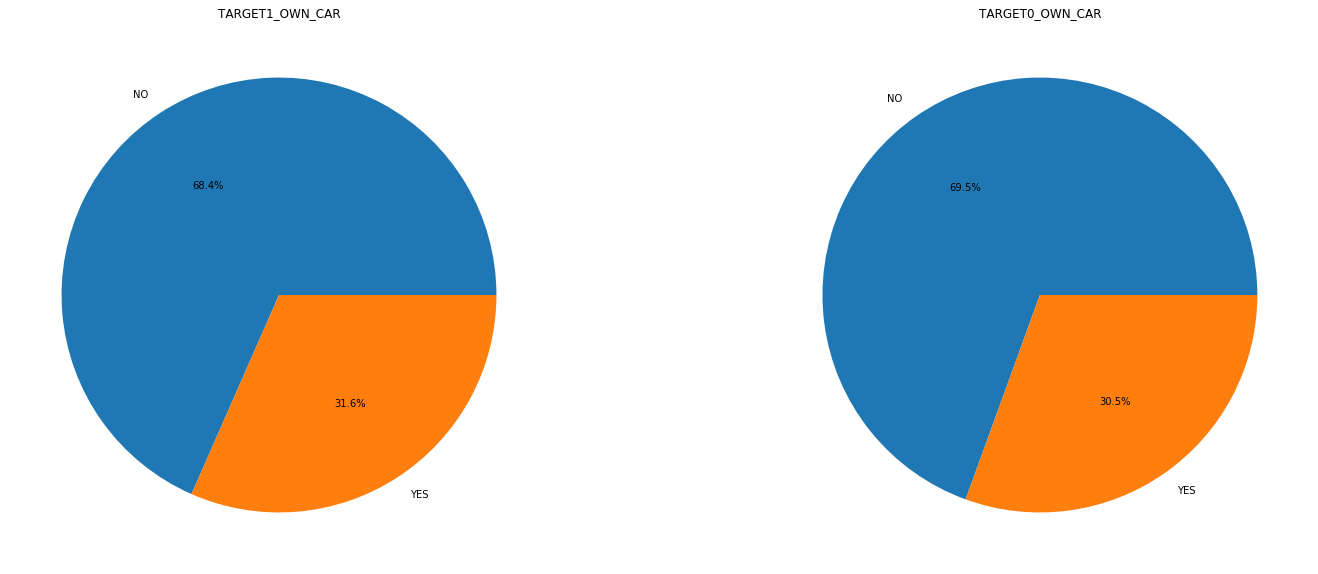

In [160]:
# グラフを横に並べたい
plt.figure(figsize=(25, 10)) # (1)描画領域を指定
plt.subplots_adjust(wspace=0.2, hspace=0) # (2)間隔指定


plt.subplot(1, 2, 1) # (3)グラフ描画位置の指定
t1r = [t1r1,t1r2]
label = ["NO", "YES"]
plt.pie(t1r, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_OWN_CAR')

plt.subplot(1, 2, 2) # (4)グラフ描画位置の指定
t0r = [t0r1,t0r2]
label = ["NO", "YES"]
plt.pie(t0r, labels=label,autopct="%1.1f%%")

plt.title('TARGET0_OWN_CAR')

 
plt.show()

In [161]:
#並んだ

#### 車や資産の所持はあまり関係していないようにみえる

#### 仮説：子供の数が多い家庭は貧困に陥りやすくローンの返済が滞りがちになるのでは

In [162]:
# CNT_CHILDREN_1~15
#TARGET1でCNT_CHILDREN_1=1(NO)
t1ch1=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_1"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_2=1(NO)
t1ch2=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_2"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_3=1(NO)
t1ch3=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_3"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_4=1(NO)
t1ch4=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_4"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_5=1(NO)
t1ch5=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_5"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_6=1(NO)
t1ch6=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_6"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_7=1(NO)
t1ch7=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_7"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_8=1(NO)
t1ch8=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_8"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_9=1(NO)
t1ch9=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_9"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_10=1(NO)
t1ch10=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_10"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_11=1(NO)
t1ch11=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_11"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_12=1(NO)
t1ch12=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_12"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_13=1(NO)
t1ch13=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_13"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_=14(NO)
t1ch14=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_14"]==1][df_gender_onehot["TARGET"]==1].count()

#TARGET1でCNT_CHILDREN_15=1(NO)
t1ch15=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_15"]==1][df_gender_onehot["TARGET"]==1].count()





# CNT_CHILDREN_1~15
#TARGET0でCNT_CHILDREN_1=1(NO)
t0ch1=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_1"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_2=1(NO)
t0ch2=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_2"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_3=1(NO)
t0ch3=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_3"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_4=1(NO)
t0ch4=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_4"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_5=1(NO)
t0ch5=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_5"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_6=1(NO)
t0ch6=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_6"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_7=1(NO)
t0ch7=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_7"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_8=1(NO)
t0ch8=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_8"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_9=1(NO)
t0ch9=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_9"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_10=1(NO)
t0ch10=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_10"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_11=1(NO)
t0ch11=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_11"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_12=1(NO)
t0ch12=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_12"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_13=1(NO)
t0ch13=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_13"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_=14(NO)
t0ch14=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_14"]==1][df_gender_onehot["TARGET"]==0].count()

#TARGET0でCNT_CHILDREN_15=1(NO)
t0ch15=df_gender_onehot.TARGET[df_gender_onehot["CNT_CHILDREN_15"]==1][df_gender_onehot["TARGET"]==0].count()




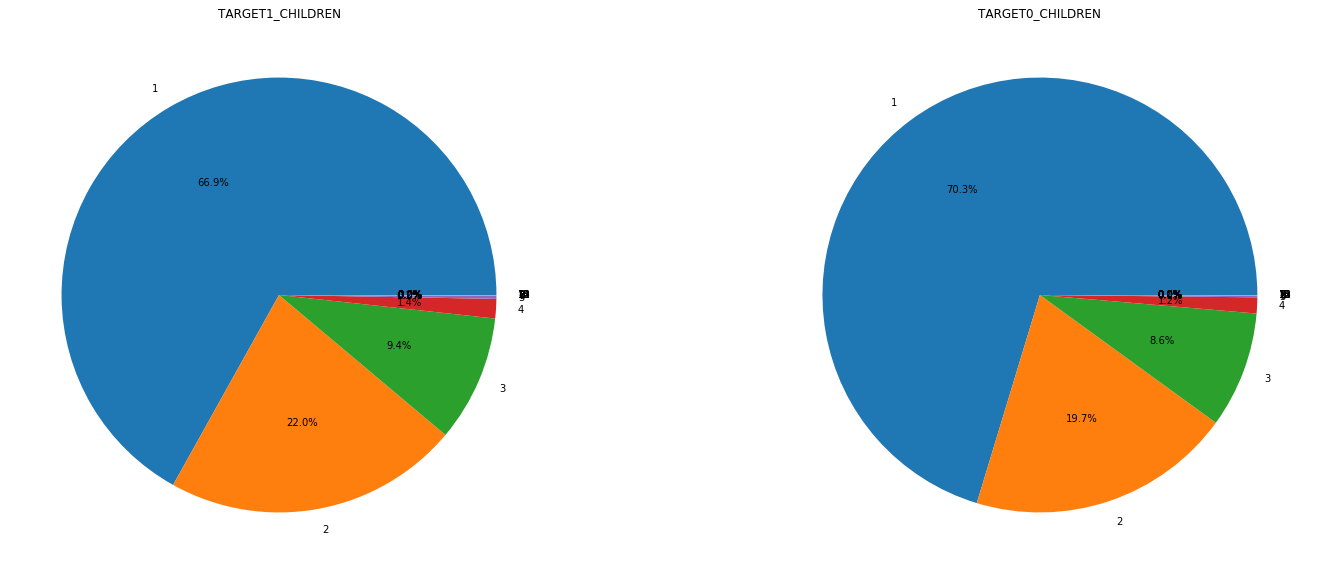

In [163]:
plt.figure(figsize=(25, 10)) # (1)描画領域を指定
plt.subplots_adjust(wspace=0.2, hspace=0) # (2)間隔指定


plt.subplot(1, 2, 1) # (3)グラフ描画位置の指定
t1ch = [t1ch1,t1ch2,t1ch3,t1ch4,t1ch5,t1ch6,t1ch7,t1ch8,t1ch9,t1ch10,t1ch11,t1ch12,t1ch13,t1ch14,t1ch15]
label = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
plt.pie(t1ch, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_CHILDREN')

plt.subplot(1, 2, 2) # (4)グラフ描画位置の指定
t0ch = [t0ch1,t0ch2,t0ch3,t0ch4,t0ch5,t0ch6,t0ch7,t0ch8,t0ch9,t0ch10,t0ch11,t0ch12,t0ch13,t0ch14,t0ch15]
label = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
plt.pie(t0ch, labels=label,autopct="%1.1f%%")

plt.title('TARGET0_CHILDREN')

 
plt.show()

#### 大きな差はなかった

#### 仮説：念の為4人以上の比率だけで出しなおしてみてみる

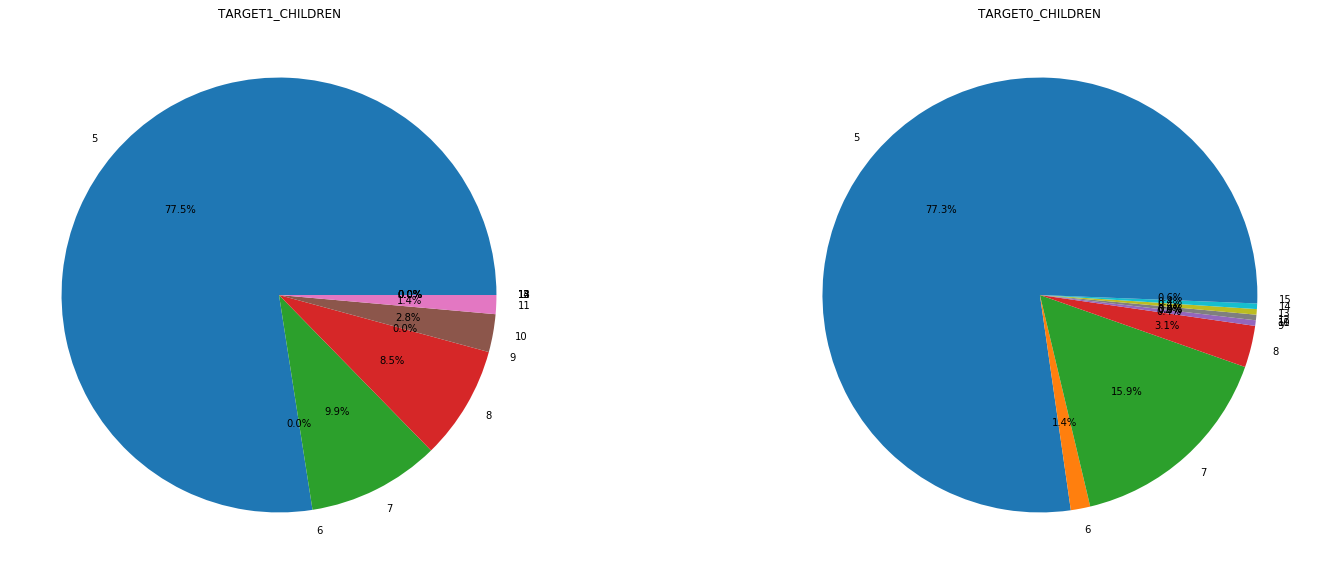

In [164]:
plt.figure(figsize=(25, 10)) # (1)描画領域を指定
plt.subplots_adjust(wspace=0.2, hspace=0) # (2)間隔指定


plt.subplot(1, 2, 1) # (3)グラフ描画位置の指定
t1ch = [t1ch5,t1ch6,t1ch7,t1ch8,t1ch9,t1ch10,t1ch11,t1ch12,t1ch13,t1ch14,t1ch15]
label = ["5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
plt.pie(t1ch, labels=label,autopct="%1.1f%%")

plt.title('TARGET1_CHILDREN')

plt.subplot(1, 2, 2) # (4)グラフ描画位置の指定
t0ch = [t0ch5,t0ch6,t0ch7,t0ch8,t0ch9,t0ch10,t0ch11,t0ch12,t0ch13,t0ch14,t0ch15]
label = ["5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15"]
plt.pie(t0ch, labels=label,autopct="%1.1f%%")

plt.title('TARGET0_CHILDREN')

 
plt.show()

#### やはり大きな差はなさそうではあるが、8人以上の子供がいる人がTARGET1である比率は多少大きいかもしれない

#### 仮説：TARGET１と0の人の収入の分布が異なっている？

In [165]:
df_gender_onehot["AMT_INCOME_TOTAL"][df_gender_onehot["TARGET"]==0].describe()

count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [166]:
df_gender_onehot["AMT_INCOME_TOTAL"][df_gender_onehot["TARGET"]==1].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### 大した差がなさそう

#### 仮説：ローン返済額が多ければ多いほど焦げ付いて返せなくなってくる

In [173]:
display(df_gender_onehot['AMT_ANNUITY'])

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
5         27517.5
6         41301.0
7         42075.0
8         33826.5
9         20250.0
10        21177.0
11        10678.5
12         5881.5
13        28966.5
14        32778.0
15        20160.0
16        26149.5
17        13500.0
18         7875.0
19        17563.5
20        21375.0
21        37561.5
22        32521.5
23        23850.0
24        12703.5
25        11074.5
26        27076.5
27        23827.5
28        57676.5
29         9000.0
30        24592.5
31        25033.5
32        20893.5
33        39069.0
34        32895.0
35        44509.5
36        23157.0
37        15151.5
38        17338.5
39        27000.0
40        35028.0
41        29196.0
42        16258.5
43        42970.5
44        48280.5
45         9000.0
46        17649.0
47        26838.0
48        37255.5
49        49927.5
50         6750.0
51        34596.0
52        14661.0
53        16164.0
54        32472.0
          

In [174]:
df_gender_onehot["AMT_ANNUITY"][df_gender_onehot["TARGET"]==0].describe()

count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [175]:
df_gender_onehot["AMT_ANNUITY"][df_gender_onehot["TARGET"]==1].describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

#### 焦げ付いてない人の方がローン額が高い・・・

#### ⑦データが９：１という不均衡を揃えてみる

##### 参考
https://blog.amedama.jp/entry/imbalanced-data  
Python: 機械学習における不均衡データの問題点と対処法について

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html  

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

サンプルプログラム
> from imblearn.under_sampling import RandomUnderSampler  
> sampler = RandomUnderSampler(random_state=42)  
> X_resampled, y_resampled = sampler.fit_resample(X, y)  

42ってなに？

In [ ]:
sampler = RandomUnderSampler(random_state=42)

In [ ]:
display(df.TARGET[df["TARGET"]==1].count())
display(df.TARGET[df["TARGET"]==0].count())

In [ ]:
#データを0と1に分ける
df_1=df_gender_onehot_0[df_gender_onehot_0["TARGET"]==1]
df_0=df_gender_onehot_0[df_gender_onehot_0["TARGET"]==0]

In [ ]:
#リサンプリング実行
#文字列は怒られるみたい
#NANも怒られるみたい
df1_resampled, df0_resampled = sampler.fit_resample(df_1, df_0)

In [ ]:
#よろしくない気がするが、NANを0で置換
df_gender_onehot_0 = df_gender_onehot.fillna(0)

In [ ]:
 display(df_gender_onehot_0)

In [ ]:
#ValueError: Unknown label type: 'continuous-multioutput'が解決できず断念。。。